### On the Tips dataset

The tips dataset is a dataset based on the tips left by a selection of 244 dining parties, taking account of the following variables:
 - total_bill (the total cost of the bill)
 - tip
 - sex
 - smoker
 - day
 - time (whether this was at lunch or dinner time)
 - size (how many people were in the party)
 
 We shall perform some analyses.

First, we need to set up python for our calculations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips') # The tips dataset already comes with seaborn, but to confirm it is the same 
                                # as the dataset we have just downloaded (which we have called somethingelse.csv),
                                # we compare the two datasets and take the sum to see how many "True"s we get.
                                # As each parameter returns the value 244, and we know there were 244 dining parties,
                                # we know the datasets match at every point, which is reassuring!
tips2=pd.read_csv('somethingelse.csv')
comparison=(tips == tips2)
comparison.sum()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [2]:
#tips # We can uncomment this and run it if we wish to see the extended list, but there is no need, so we just use
      # the following to look at a small selection, to check that the data format 'looks' right.
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Now we have python set up, and the dataset imported, it is time look at some more of its properties, before conducting any in-depth analysis.

In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Univariate analysis
We first give a brief overview of the individual variables.

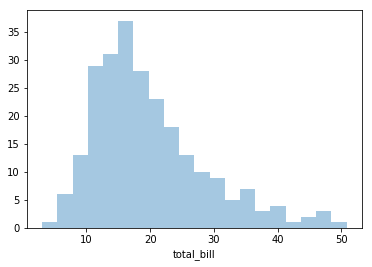

In [28]:
total_bill_graph=sns.distplot(tips['total_bill'],kde=False,bins=20); # kde = False means the y-xis
                                                                     # provides the actual number
                                                                     # bins = 20 means the entries are
                                                                     # divided into 20 slots according
                                                                     # to size
plt.show(total_bill_graph)